In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 1500,1000
create_opengl_context((WIDTH, HEIGHT))

# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def addVertex(a,b):#add vertex with point size 4
   gl.glPointSize(4) #pixel size. by default 1 thake
   gl.glBegin(gl.GL_POINTS)
   gl.glVertex2f( a/(WIDTH/2), b/(HEIGHT/2) ) #jekhane show korbe pixel
   gl.glEnd()

In [ ]:
def addVertex_y(a,b):#add vertex with point size 5
   gl.glPointSize(5) #pixel size. by default 1 thake
   gl.glBegin(gl.GL_POINTS)
   gl.glVertex2f( a/(WIDTH/2), b/(HEIGHT/2) ) #jekhane show korbe pixel
   gl.glEnd()

In [ ]:
import math
import random

In [ ]:
def zoneFind(x1, y1, x2, y2):#zone finder
   zone = 0
   dx = x2 - x1
   dy = y2 - y1
   if abs(dx) > abs(dy):
       if (x2 > x1 and y2 >= y1):
           zone = 0
       elif (x2 < x1 and y2 >= y1):
           zone = 3
       elif (x2 < x1 and y2 < y1):
           zone = 4
       elif (x2 > x1 and y2 < y1):
           zone = 7
   else:
       if (x2 >= x1 and y2 > y1):
           zone = 1
       elif (x2 < x1 and y2 > y1):
           zone = 2
       elif (x2 < x1 and y2 < y1):
           zone = 5
       elif (x2 >= x1 and y2 < y1):
           zone = 6
   return zone


def zoneConvert(a, b, x, y):#zone convertion form 0-any or any-0
   if a == 0:
       if b == 1:
           return y, x
       elif b == 2:
           return -1 * y, x
       elif b == 3:
           return -1 * x, y
       elif b == 4:
           return -1 * x, -1 * y
       elif b == 5:
           return -1 * y, -1 * x
       elif b == 6:
           return y, -1 * x
       elif b == 7:
           return x, -1 * y
   else:
       if a == 1:
           return y, x
       elif a == 2:
           return y, -1 * x
       elif a == 3:
           return -1 * x, y
       elif a == 4:
           return -1 * x, -1 * y
       elif a == 5:
           return -1 * y, -1 * x
       elif a == 6:
           return -1 * y, x
       elif a == 7:
           return x, -1 * y


def midPoint(x1, y1, x2, y2):#midPoint line drawing
   zone = zoneFind(x1, y1, x2, y2)
   if zone == 0:
       dx = x2 - x1
       dy = y2 - y1
       d = 2 * dy - dx
       incE = 2 * dy
       incNE = 2 * (dy - dx)
       y = y1
       for x in range(x1, x2 + 1):
           addVertex(x, y)
           if d > 0:
               d = d + incNE
               y = y + 1
           else:
               d = d + incE
   else:
       x_1, y_1 = zoneConvert(zone, 0, x1, y1)
       x_2, y_2 = zoneConvert(zone, 0, x2, y2)
       dx = x_2 - x_1
       dy = y_2 - y_1
       d = 2 * dy - dx
       incE = 2 * dy
       incNE = 2 * (dy - dx)
       y = y_1
       for x in range(x_1, x_2 + 1):
           temp_1, temp_2 = zoneConvert(0, zone, x, y)
           addVertex(temp_1, temp_2)
           if d > 0:
               d = d + incNE
               y = y + 1
           else:
               d = d + incE

def circle(r):#circle with exactly (0,0) center / UNUSED
   x=r
   y=0
   d = 1 - r
   while x > y:
       y += 1
       if d <= 0:
           d = d + 2 * y + 1
       else:
           x -= 1
           d = d + 2 * y - 2 * x + 1
       if (x < y):
           break
       else:
           addVertex(x,y)
           for i in range(1,8):
               temp_1,temp_2=zoneConvert(0, i, x, y)
               addVertex(temp_1,temp_2)
def inner_circle(center_x,center_y,r):#circle with (x,y) center
   x=r
   y=0
   d = 1 - r
   while x > y:
       y += 1
       if d <= 0:
           d = d + 2 * y + 1
       else:
           x -= 1
           d = d + 2 * y - 2 * x + 1
       if (x < y):
           break
       else:
           addVertex(x+center_x,y+center_y)
           for i in range(1,8):
                temp_1, temp_2 = zoneConvert(0, i, x, y)
                addVertex(temp_1 + center_x, temp_2 + center_y)

def inner_design(n,r,x_c,y_c):#extra code
   angle=0
   step=(2*math.pi)/n
   x=r*(math.cos(angle))+x_c
   y=r*(math.sin(angle))+y_c
   inner_circle(x,y,r)
   angle += step
   number = 1
   while(number<n):
           x = r * (math.cos(angle))+x_c
           y = r * (math.sin(angle))+y_c
           inner_circle(x,y, r)
           angle += step
           number += 1

def designed_circle(r,x,y,n=0): #extra code
   inner_circle(x,y,r)
   if n>0:
    inner_design(n, r // 2,x,y)

In [ ]:
def block_circle(x,y,r):#coloured circle
  inner_circle(x,y,r)
  temp=r-1
  while temp>=0:
    inner_circle(x,y,temp)
    temp-=1

In [ ]:
def inner_design_cloud(n,r,x_c,y_c):#cloud circle
   angle=0
   step=(2*math.pi)/n
   x=r*(math.cos(angle))+x_c
   y=r*(math.sin(angle))+y_c
   inner_circle(x,y,r)
   angle += step
   number = 1
   while(number<=n):
           x = r * (math.cos(angle))+x_c
           y = r * (math.sin(angle))+y_c
           block_circle(x,y,r)
           angle += step
           number += 1

In [ ]:
def designed_circle_cloud(r,x,y,n=0):#cloud circle
   inner_circle(x,y,r)
   if n>0:
    inner_design_cloud(n, r ,x,y)

In [ ]:
def midPoint_ship(x1, y1, x2, y2):#point to line drawing code / unused
   zone = zoneFind(x1, y1, x2, y2)
   if zone == 0:
       dx = x2 - x1
       dy = y2 - y1
       d = 2 * dy - dx
       incE = 2 * dy
       incNE = 2 * (dy - dx)
       y = y1
       for x in range(x1, x2 + 1):
           midPoint(x, y,x-200,y)
           if d > 0:
               d = d + incNE
               y = y + 1
           else:
               d = d + incE
   else:
       x_1, y_1 = zoneConvert(zone, 0, x1, y1)
       x_2, y_2 = zoneConvert(zone, 0, x2, y2)
       dx = x_2 - x_1
       dy = y_2 - y_1
       d = 2 * dy - dx
       incE = 2 * dy
       incNE = 2 * (dy - dx)
       y = y_1
       for x in range(x_1, x_2 + 1):
           temp_1, temp_2 = zoneConvert(0, zone, x, y)
           midPoint(temp_1, temp_2,temp_1-200,temp_2)
           if d > 0:
               d = d + incNE
               y = y + 1
           else:
               d = d + incE

In [ ]:
def sun(position="Morning",size=1):
  if position=="Morning":
    gl.glColor3f(1.0,1.0, 0.0)
    block_circle(500,430,size*60)
  elif position=="Afternoon":
    gl.glColor3f(1.0, .5, 0.0)
    block_circle(-500,430,size*60)
  elif position=="Noon":
    gl.glColor3f(1.0, .7, 0.0)
    block_circle(190,430,size*60)

In [ ]:
def moon(size=1):
    gl.glColor3f(0.8, 0.8, 0.8)
    block_circle(500,430,size*50)
    gl.glColor3f(1, 1, 1)
    block_circle(500,435,size*45)
    #designed_circle(50,500,-380,360)

In [ ]:
def sky(time="Morning"):
  if time=="Morning":
   gl.glColor3f(.51, 1.53,2.55)
  elif time=="Night":
    gl.glColor3f(0, 0,.5)
  elif time=="Afternoon":
    gl.glColor3f(0.1, 0.26,2.53)
  elif time=="Noon":
    gl.glColor3f(0, 0.46,2.53)
  for i in range(10,501):
    midPoint(-750,i,750,i)

In [ ]:
def cloud(n=1,r=60):
  y=380
  diff=750//n
  gl.glColor3f(0.6, 0.6, 0.6)
  for i in range(-750,751,diff):
    x=i
    block_circle(x,430,r)
    designed_circle_cloud(r,x,430,6)

In [ ]:
import math
import random
def star(n=100):
  gl.glColor3f(160, 160, 160)
  for i in range(n):
   a=float(random.randint(-1*750,750))
   b=float(random.randint(100,499))
   addVertex(a,b)

In [ ]:
import math
import random
def ocean(time="Night",wave=10):
  gl.glColor3f(0,0,0)
  for i in range(9,3,-1):
    midPoint(-750,i,750,i)
  if time=="Night":
    gl.glColor3f(0,0,.3)
  else:
    gl.glColor3f(0,0,.6)
  for i in range(3,-500,-1):
    midPoint(-750,i,750,i)
  gl.glColor3f(0, 0, 0)
  for i in range(0,wave,1):
    a=random.randint(-1*750,750)
    c=random.randint(-1*750,750)
    b=random.randint(-499,3)
    midPoint(a,b,c,b)

In [ ]:
def addVertex_x(a,b):#add vertex for OpenGL QUADS
    gl.glVertex2f( a/(WIDTH/2), b/(HEIGHT/2) )

In [ ]:
def translation(x,y,amnt_x,amnt_y=0):
    # move the point to a direction by a certain amount
    matrix1 = np.array([[x], [y]])
    matrix2 = np.array([[amnt_x], [amnt_y]])
    result = np.add(matrix1, matrix2)
    return result[0],result[1]

In [ ]:
import math
import random
def ship(x=0,y=-230,size=1):
  gl.glColor3f(0,0,0)
  gl.glBegin(gl.GL_QUADS)#base
  addVertex_x((x+size*100),(y))
  addVertex_x((x+size*80),(y-size*30))
  addVertex_x((x-size*80),(y-size*30))
  addVertex_x((x-size*100),(y))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint((x+size*100),(y),(x+size*80),(y-size*30))#border
  midPoint((x+size*80),(y-size*30),(x-size*80),(y-size*30))
  midPoint((x-size*80),(y-size*30),(x-size*100),(y))
  midPoint((x-size*100),(y),(x+size*100),(y))
  dif=((size*100+x-x+size*100))//4
  for temp in range(((x-size*100))+dif,(x+size*100),dif):#windows
    gl.glColor3f(1,1,0)
    block_circle(temp,((y+(y-size*30))//2),((y-(y-size*30))//2)-size*10)

  gl.glColor3f(1,1,1)
  gl.glBegin(gl.GL_QUADS)#floor1
  addVertex_x((x+size*80),(y+size*20))
  addVertex_x((x+size*80),(y))
  addVertex_x((x-size*80),(y))
  addVertex_x((x-size*80),(y+size*20))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint((x+size*80),(y+size*20),(x+size*80),(y))#border
  midPoint((x+size*80),(y),(x-size*80),(y))
  midPoint((x-size*80),(y),(x-size*80),(y+size*20))
  midPoint((x-size*80),(y+size*20),(x+size*80),(y+size*20))
  dif=((size*80+x-x+size*80))//4
  for temp in range(((x-size*80))+dif,(x+size*80),dif):#windows
    gl.glColor3f(0,0,0)
    block_circle(temp,((y+(y+size*20))//2),((y+size*20-y)//2)-size*6)

  gl.glColor3f(1,1, 1)
  gl.glBegin(gl.GL_QUADS)#floor2
  addVertex_x((x+size*60),(y+size*30))
  addVertex_x((x+size*60),(y+size*20))
  addVertex_x((x-size*60),(y+size*20))
  addVertex_x((x-size*60),(y+size*30))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint((x+size*60),(y+size*30),(x+size*60),(y+size*20))#border
  midPoint((x+size*60),(y+size*20),(x-size*60),(y+size*20))
  midPoint((x-size*60),(y+size*20),(x-size*60),(y+size*30))
  midPoint((x-size*60),(y+size*30),(x+size*60),(y+size*30))
  dif=((size*60+x-x+size*60))//4
  for temp in range(((x-size*60))+dif,(x+size*60),dif):#windows
    gl.glColor3f(0,0,0)
    block_circle(temp,(((y+size*30)+(y+size*21))//2),(((y+size*30-(y+size*21))//2)-size*3))

  gl.glColor3f(0.6, 0.6, 0.6)
  gl.glBegin(gl.GL_QUADS)#chimney
  addVertex_x((x+size*15),(y+size*45))
  addVertex_x((x+size*15),(y+size*30))
  addVertex_x((x-size*15),(y+size*30))
  addVertex_x((x-size*15),(y+size*45))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint((x+size*15),(y+size*45),(x+size*15),(y+size*30))#border
  midPoint((x+size*15),(y+size*30),(x-size*15),(y+size*30))
  midPoint((x-size*15),(y+size*30),(x-size*15),(y+size*45))
  midPoint((x-size*15),(y+size*45),(x+size*15),(y+size*45))
  gl.glColor3f(0.6, 0.6, 0.6)
  x_c,y_c=x,(size*53+y)#smoke
  t=random.randint(2,4)
  for i in range(t):
    block_circle(x_c,y_c,size*5)
    x_c-=size*15
  gl.glColor3f(0,0.4, 0)
  gl.glBegin(gl.GL_QUADS)#Flag
  addVertex_x((x+size*60),(y+size*50))
  addVertex_x((x+size*60),(y+size*35))
  addVertex_x((x+size*30),(y+size*35))
  addVertex_x((x+size*30),(y+size*50))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint((x+size*60),(y+size*50),(x+size*60),(y+size*30))#border
  midPoint((x+size*60),(y+size*35),(x+size*30),(y+size*35))
  midPoint((x+size*30),(y+size*35),(x+size*30),(y+size*50))
  midPoint((x+size*30),(y+size*50),(x+size*60),(y+size*50))
  gl.glColor3f(0.8, 0, 0)
  block_circle(((x+size*60)+(x+size*30))//2,((y+size*50)+(y+size*35))//2,size*4)

In [ ]:
def background(time="Night",cloudy="Yes",cloud_num=1,cloud_rad=60,star_num=100,sun_or_moon_size=1,wave_num=10,ship_x=0,ship_y=-230,ship_size=2):
  #gl.glClear(gl.GL_COLOR_BUFFER_BIT)
  sky(time)
  if time=="Night":
    star(star_num)
    moon(sun_or_moon_size)
    ocean(time,wave_num)
    ship(ship_x,ship_y,ship_size)
  else:
    sun(time,sun_or_moon_size)
    if cloudy=="Yes":
      cloud(cloud_num,cloud_rad)
    ocean(time,wave_num)
    ship(ship_x,ship_y,ship_size)

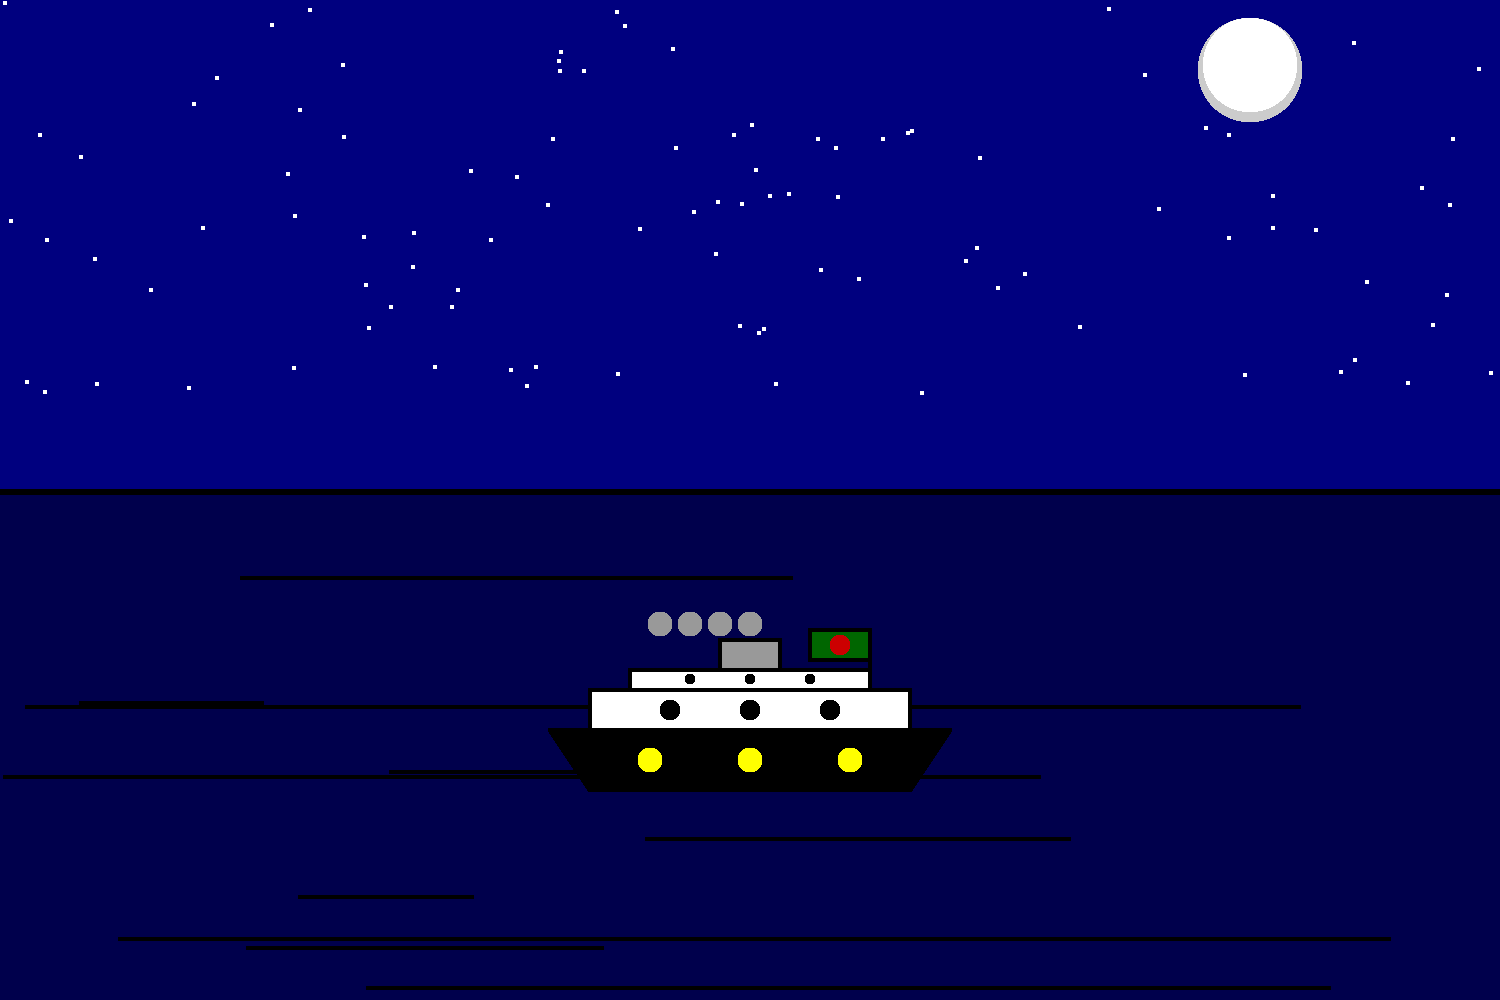

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
background()
from PIL import Image
from IPython.display import clear_output #render library
from IPython.display import display #render library
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

In [ ]:
import time  #animate
from IPython.display import clear_output #render library
from IPython.display import display #render library
from PIL import Image #render library
def render(): #animate
  img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
  img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
  display(Image.fromarray(img,'RGB'))

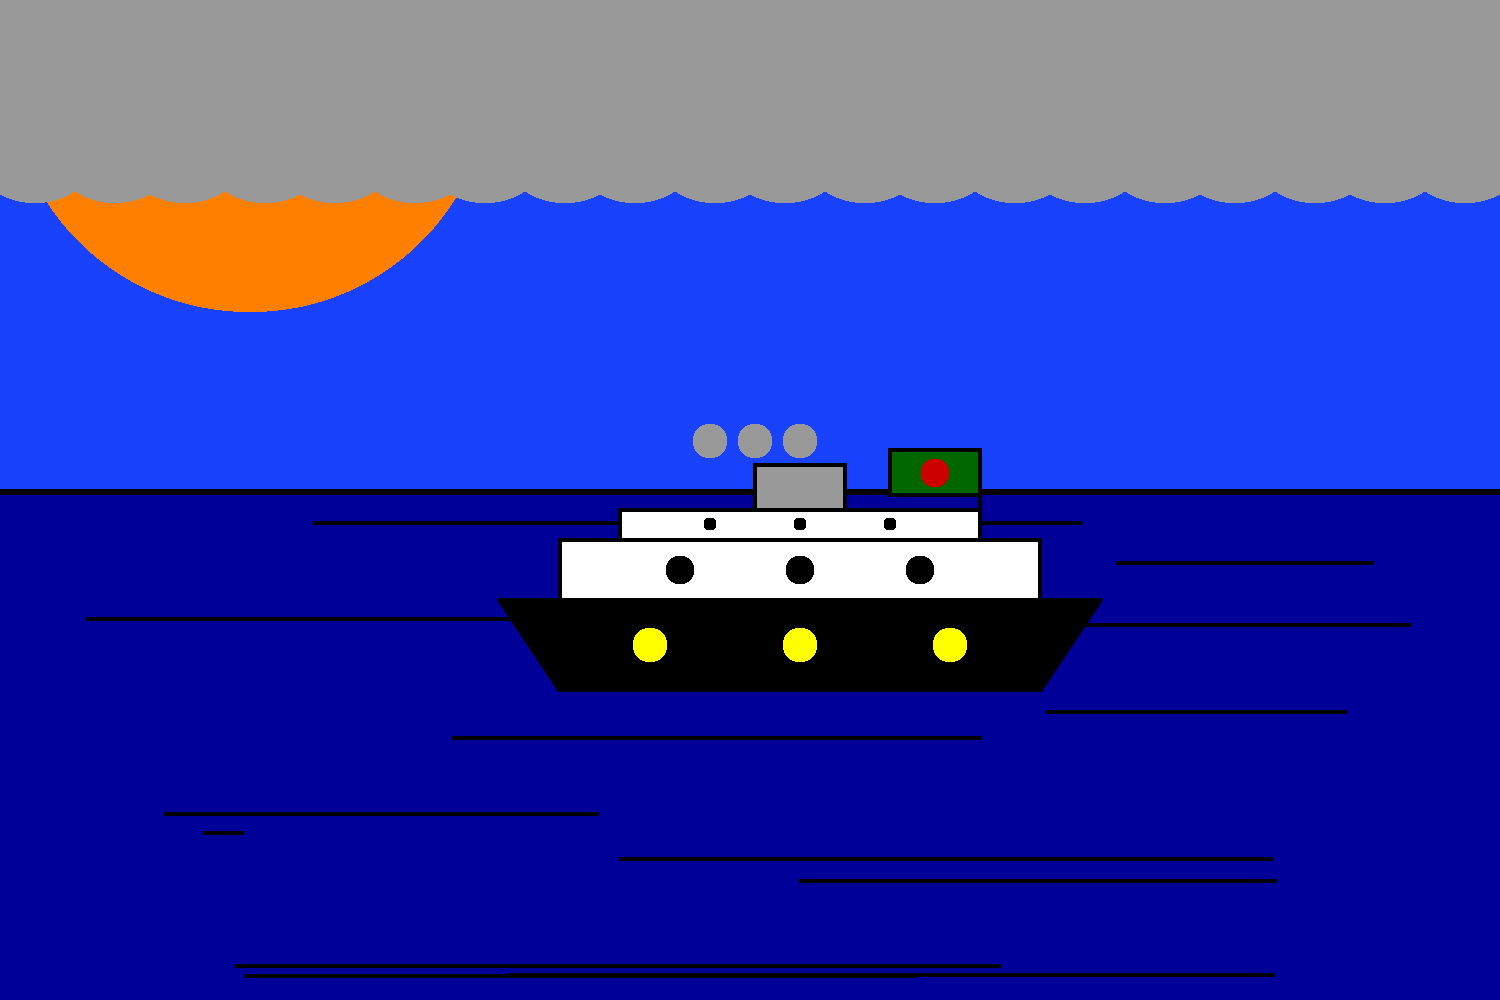

In [ ]:
tim=input("Enter you preffered time(Available: Morning, Noon, Afternoon, Night): ")
if tim!="Night":
  sun_or_moon_size=int(input("Enter your sun size(recommended size<=4): "))
  if sun_or_moon_size<1 or sun_or_moon_size>4:
    if sun_or_moon_size<1:
      sun_or_moon_size=1
    else:
      sun_or_moon_size=4

  cloudy=input("Is your sky cloudy? ")
  if cloudy=="Yes":
   cloud_num=int(input("Enter your cloud count(recommended=5): "))
   cloud_rad=int(input("Enter your cloud radious(recommended=65): "))
  else:
    cloud_num=0
    cloud_rad=0
  star_num=0
else:
  cloudy="No"
  cloud_num=0
  cloud_rad=0
  star_num=int(input("Enter your star count(recommended number>=100): "))
  sun_or_moon_size=int(input("Enter your moon size(recommended size<=4): "))
  if sun_or_moon_size<1 or sun_or_moon_size>4:
    if sun_or_moon_size<1:
      sun_or_moon_size=1
    else:
      sun_or_moon_size=4

wave_num=int(input("Enter your wave count(recommended number<=10): "))
ship_x=int(input("Enter x co-ordinate for your ship(recommende x=(-750 to-700)): "))
ship_y=int(input("Enter y co-ordinate for your ship(recommende y=(-230 to 0)): "))
ship_size=int(input("Enter your ship size(recommended size<=2): "))
if ship_x <-750 or ship_x>750:
  if ship_x<-750:
    ship_x=-750
  else:
    ship_x=0
if ship_y>0 or ship_y<-400:
  if ship_y>0:
    ship_y=0
  else:
    ship_y=-400
if ship_size<1 or ship_size>3:
  if ship_size<1:
    ship_size=1
  else:
    ship_size=3
diff_x=int(input("Enter your x axis velocity(recommended velocity<=150): "))
diff_y=int(input("Enter your y axis velocity(recommended velocity=0): "))
while(ship_x<750):
  gl.glClear(gl.GL_COLOR_BUFFER_BIT)
  background(tim,cloudy,cloud_num,cloud_rad,star_num,sun_or_moon_size,wave_num,ship_x,ship_y,ship_size)
  if ship_y<=0:
   a,b=translation(ship_x,ship_y,diff_x,diff_y)
   ship_x,ship_y=a[0],b[0]
  else:
   a,b=translation(ship_x,ship_y,diff_x,0)
   ship_x,ship_y=a[0],b[0]
  render() #animate
  time.sleep(0.7) #animate
  clear_output(wait=True) #this actually refreshes the window
#render()

In [ ]:
'''import math
import random
def ship(x=0,y=-230,size=1):
  gl.glColor3f(0,0,0)
  gl.glBegin(gl.GL_QUADS)#base
  addVertex_x(size*(x+100),size*(y))
  addVertex_x(size*(x+80),size*(y-30))
  addVertex_x(size*(x-80),size*(y-30))
  addVertex_x(size*(x-100),size*(y))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint(size*(x+100),size*(y),size*(x+80),size*(y-30))#border
  midPoint(size*(x+80),size*(y-30),size*(x-80),size*(y-30))
  midPoint(size*(x-80),size*(y-30),size*(x-100),size*(y))
  midPoint(size*(x-100),size*(y),size*(x+100),size*(y))
  dif=(size*(100+x-x+100))//4
  for temp in range((size*(x-100))+dif,size*(x+100),dif):#windows
    gl.glColor3f(1,1,0)
    block_circle(temp,(size*(y+(y-30))//2),(size*(y-(y-30))//2)-size*10)

  gl.glColor3f(1,1,1)
  gl.glBegin(gl.GL_QUADS)#floor1
  addVertex_x(size*(x+80),size*(y+20))
  addVertex_x(size*(x+80),size*(y))
  addVertex_x(size*(x-80),size*(y))
  addVertex_x(size*(x-80),size*(y+20))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint(size*(x+80),size*(y+20),size*(x+80),size*(y))#border
  midPoint(size*(x+80),size*(y),size*(x-80),size*(y))
  midPoint(size*(x-80),size*(y),size*(x-80),size*(y+20))
  midPoint(size*(x-80),size*(y+20),size*(x+80),size*(y+20))
  dif=(size*(80+x-x+80))//4
  for temp in range((size*(x-80))+dif,size*(x+80),dif):#windows
    gl.glColor3f(0,0,0)
    block_circle(temp,(size*(y+(y+20))//2),(size*(y+20-y)//2)-size*6)

  gl.glColor3f(1,1, 1)
  gl.glBegin(gl.GL_QUADS)#floor2
  addVertex_x(size*(x+60),size*(y+30))
  addVertex_x(size*(x+60),size*(y+20))
  addVertex_x(size*(x-60),size*(y+20))
  addVertex_x(size*(x-60),size*(y+30))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint(size*(x+60),size*(y+30),size*(x+60),size*(y+20))#border
  midPoint(size*(x+60),size*(y+20),size*(x-60),size*(y+20))
  midPoint(size*(x-60),size*(y+20),size*(x-60),size*(y+30))
  midPoint(size*(x-60),size*(y+30),size*(x+60),size*(y+30))
  dif=(size*(60+x-x+60))//4
  for temp in range((size*(x-60))+dif,size*(x+60),dif):#windows
    gl.glColor3f(0,0,0)
    block_circle(temp,(size*((y+30)+(y+21))//2),((size*(y+30-(y+21))//2)-size*3))

  gl.glColor3f(0.6, 0.6, 0.6)
  gl.glBegin(gl.GL_QUADS)#chimney
  addVertex_x(size*(x+15),size*(y+45))
  addVertex_x(size*(x+15),size*(y+30))
  addVertex_x(size*(x-15),size*(y+30))
  addVertex_x(size*(x-15),size*(y+45))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint(size*(x+15),size*(y+45),size*(x+15),size*(y+30))#border
  midPoint(size*(x+15),size*(y+30),size*(x-15),size*(y+30))
  midPoint(size*(x-15),size*(y+30),size*(x-15),size*(y+45))
  midPoint(size*(x-15),size*(y+45),size*(x+15),size*(y+45))
  gl.glColor3f(0.6, 0.6, 0.6)
  x_c,y_c=size*x,size*(53+y)#smoke
  t=4#random.randint(2,4)
  for i in range(t):
    block_circle(x_c,y_c,size*5)
    x_c-=size*15
  gl.glColor3f(0,0.4, 0)
  gl.glBegin(gl.GL_QUADS)#Flag
  addVertex_x(size*(x+60),size*(y+50))
  addVertex_x(size*(x+60),size*(y+35))
  addVertex_x(size*(x+30),size*(y+35))
  addVertex_x(size*(x+30),size*(y+50))
  gl.glEnd()
  gl.glColor3f(0, 0, 0)
  midPoint(size*(x+60),size*(y+50),size*(x+60),size*(y+30))#border
  midPoint(size*(x+60),size*(y+35),size*(x+30),size*(y+35))
  midPoint(size*(x+30),size*(y+35),size*(x+30),size*(y+50))
  midPoint(size*(x+30),size*(y+50),size*(x+60),size*(y+50))
  gl.glColor3f(0.8, 0, 0)
  block_circle((size*(x+60)+size*(x+30))//2,(size*(y+50)+size*(y+35))//2,4)'''

'import math\nimport random\ndef ship(x=0,y=-230,size=1):\n  gl.glColor3f(0,0,0)\n  gl.glBegin(gl.GL_QUADS)#base\n  addVertex_x(size*(x+100),size*(y))\n  addVertex_x(size*(x+80),size*(y-30))\n  addVertex_x(size*(x-80),size*(y-30))\n  addVertex_x(size*(x-100),size*(y))\n  gl.glEnd()\n  gl.glColor3f(0, 0, 0)\n  midPoint(size*(x+100),size*(y),size*(x+80),size*(y-30))#border\n  midPoint(size*(x+80),size*(y-30),size*(x-80),size*(y-30))\n  midPoint(size*(x-80),size*(y-30),size*(x-100),size*(y))\n  midPoint(size*(x-100),size*(y),size*(x+100),size*(y))\n  dif=(size*(100+x-x+100))//4\n  for temp in range((size*(x-100))+dif,size*(x+100),dif):#windows\n    gl.glColor3f(1,1,0)\n    block_circle(temp,(size*(y+(y-30))//2),(size*(y-(y-30))//2)-size*10)\n  \n  gl.glColor3f(1,1,1)\n  gl.glBegin(gl.GL_QUADS)#floor1\n  addVertex_x(size*(x+80),size*(y+20))\n  addVertex_x(size*(x+80),size*(y))\n  addVertex_x(size*(x-80),size*(y))\n  addVertex_x(size*(x-80),size*(y+20))\n  gl.glEnd()\n  gl.glColor3f(0, 0, 0